# Índice
- [Abstract](#abstract)
- [Objetivo](#objetivo)
- [Contexto Comercial y Analítico](#contexto-comercial-y-analítico)
- [EDA y Visualización de Datos](#eda-y-visualización-de-datos)
- [Conclusión EDA](#conclusión-eda)
- [Modelo de Árbol de Decisión](#modelo-de-árbol-de-decisión)
- [Modelo de Regresión Logística](#modelo-de-regresión-logística)
- [Conclusión Modelos](#conclusión-modelos)


# <a id="abstract"></a> **Abstract**


En la sociedad de consumo actual, las herramientas que puedan facilitar la retención de clientes se vuelven fundamentales para cualquier empresa. Por eso directivos, gerentes y analistas financieros buscan constantemente comprender los factores que influyen en el abanodno de clientes para asi poder desarrollar estrategias efectivas para retenerlos. Este proyecto se enfoca en analizar y modelar la deserción de clientes en un banco, utilizando datos comportamentales de aproximadamente 10,000 clientes.

A través del previo analisis exploratorio EDA y el uso de modelos de Machine Learning, como la Regresión Logística y el Árbol de Decisión, se identificarán las variables clave que afectan la probabilidad de deserción,y asi predecir quienes son los clientes con mas probabilidad de abandonar el banco.

# <a id="objetivo"></a>  **Objetivo**

El objetivo de este analisis es poder predecir la variable de abandono de clientes **`Attrition_Flag`**, es decir predecir si un cliente permanecerá en el banco o lo abandonará. Asi podremos identificar a los propensos desertores y retenerlos con diversas estrategias.



# **Contexto** <a id="contexto-comercial-y-analitico"></a>
Tener el poder de evitar el abandono de clientes es crucial para mantener las ganancias y la estabilidad financiera del banco. Por este motivo, analizaremos la informacion que el banco recolectó sobre sus clientes para entender mejor los factores que influyen en la retención y deserción, y asi poder identificar patrones en los que basaremos nuestros modelos para predecir la probabilidad de que un cliente abandone o no el banco. De esta manera el banco puede desarrollar estrategias más efectivas para retenerlos y así evitar perdidas financieras.

# **Contexto Analítico**
Se proporciona un DataFrame extraido de Kaggle con información sobre aproximadamente 10,000 clientes de un banco, incluyendo 23 variables relacionadas con las características demográficas y el comportamiento financiero de los clientes. La finalidad del análisis es identificar las variables que afectan la deserción de clientes y desarrollar un modelo predictivo.

**Hipótesis:**
Un límite de crédito más alto influye positivamente en la retención de clientes, disminuyendo la probabilidad de deserción. El numero de meses inactivos podria darnos claras advertencias de desercion. El numero de transacciones realizadas y su frecuencia podrian ser claves para identificar desertores.

**Preguntas a responder:**
¿El límite de crédito más alto está asociado con una menor probabilidad de deserción?
¿El número de meses inactivos es un indicador significativo de deserción?
¿Cómo influye el número total de transacciones realizadas en la probabilidad de deserción de un cliente?
¿La frecuencia de uso de la tarjeta está correlacionada con la retención de clientes?

**Variables del DataSet**

Clientnum: Número del cliente (se eliminará por no ser relevante para el análisis)
Attrition_Flag: Indica si el cliente ha desertado (1) o no (0).
Customer_Age: Edad del cliente.
Gender: Género del cliente.
Dependent_count: Número de dependientes.
Education_Level: Nivel de educación del cliente.
Marital_Status: Estado civil del cliente.
Income_Category: Categoría de ingresos del cliente.
Card_Category: Tipo de tarjeta de crédito.
Months_on_book: Tiempo en meses que el cliente ha estado con el banco.
Total_Relationship_Count: Número total de productos de relación (cuentas, tarjetas, etc.).
Months_Inactive_12_mon: Número de meses inactivos en los últimos 12 meses.
Contacts_Count_12_mon: Número de contactos con el servicio al cliente en los últimos 12 meses.
Credit_Limit: Límite de crédito del cliente.
Total_Revolving_Bal: Saldo total de la tarjeta de crédito.
Avg_Open_To_Buy: Promedio disponible para gastar.
Total_Amt_Chng_Q4_Q1: Cambio en el monto total de transacciones del cuarto trimestre al primer trimestre.
Total_Trans_Amt: Monto total de transacciones.
Total_Trans_Ct: Número total de transacciones.
Total_Ct_Chng_Q4_Q1: Cambio en el número total de transacciones del cuarto trimestre al primer trimestre.
Avg_Utilization_Ratio: Tasa de utilización promedio de la tarjeta de crédito.


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/Melanydaian/ProyectoDS_Parte1_Amarillo/main/BankChurners.csv'

df = pd.read_csv(url)





# <a id="eda-y-visualizacion-de-datos"></a>**EDA y visualizacion de datos**

In [64]:
df.info() #Extraigo informacion del data set

df.describe()  #Extriago las metricas descriptivas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [65]:
df.isnull().sum() #Reviso si hay nulos (no hay)

#Manejo de valores nulos: como este dataset no contiene nulos lo que voy a hacer es introducir valores nulos artificialmente en el dataset y mostrar diferentes métodos para tratarlos.

np.random.seed(42)
data_with_nans = df.copy()
#Introduciré valores nulos en 'Income_Category' aleatoriamente
nan_indices = np.random.choice(data_with_nans.index, size=50, replace=False)
data_with_nans.loc[nan_indices, 'Income_Category'] = np.nan

#Mostramos los valores nulos
data_with_nans.isnull().sum()


CLIENTNUM                                                                                                                              0
Attrition_Flag                                                                                                                         0
Customer_Age                                                                                                                           0
Gender                                                                                                                                 0
Dependent_count                                                                                                                        0
Education_Level                                                                                                                        0
Marital_Status                                                                                                                         0
Income_Category                          

In [22]:
#Usare dos metodos vistos para manejar valores nulos
#Elimino filas con valores nulos
data_dropped_nans = data_with_nans.dropna(subset=['Income_Category'])

#Relleno con el valor más frecuente
most_frequent_value = data_with_nans['Income_Category'].mode()[0]
data_filled_nans = data_with_nans.fillna({'Income_Category': most_frequent_value})

#Muestro los datos procesados
print('Después de haber eliminado los valores nulos:')
print(data_dropped_nans.isnull().sum())
print('Después de haber rellenado los valores nulos:')
print(data_filled_nans.isnull().sum())

Después de haber eliminado los valores nulos:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
In

In [66]:
#Ahora que ya procesamos los nulos,  podemos recategorizar las variables objet a categoricas para un analisis mas eficaz
categoricas = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categoricas:
    df[col] = df[col].astype('category')
print(df.dtypes)

CLIENTNUM                                                                                                                                int64
Attrition_Flag                                                                                                                        category
Customer_Age                                                                                                                             int64
Gender                                                                                                                                category
Dependent_count                                                                                                                          int64
Education_Level                                                                                                                       category
Marital_Status                                                                                                                        category

In [67]:
#Vamos a eliminar las columnas innecesarias que existen, clientnum que no es relevante y las dos ultimas columnas que indicaban que sean eliminadas al descargar el data set
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

#filtramos las columnas que existen en el DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df_cleaned = df.drop(columns=columns_to_drop)

print(df_cleaned.head())




      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3      

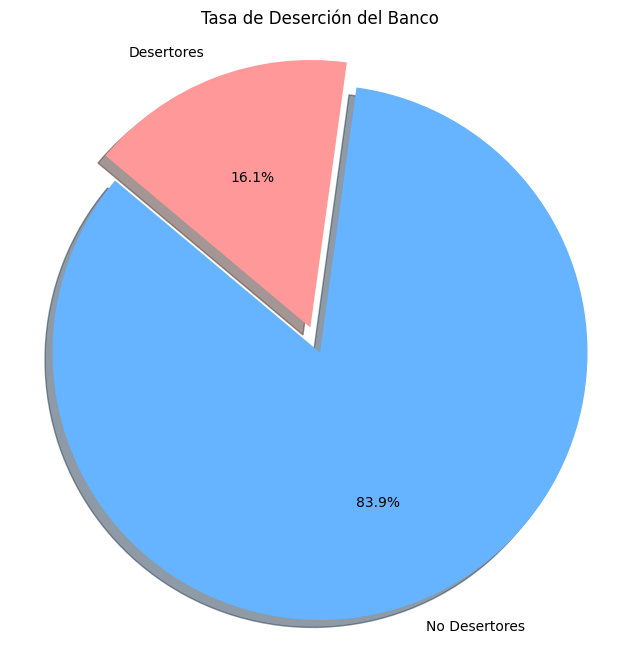

In [40]:
#Uso un pie chart para mostrar la tasa de deserción (nuestra variable objetivo)
plt.figure(figsize=(8, 8))
desercion_counts = df_cleaned['Attrition_Flag'].value_counts()
labels = ['No Desertores', 'Desertores']
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)

plt.pie(desercion_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Tasa de Deserción del Banco')
plt.axis('equal')
plt.show()


Se crea este grafico de torta con el fin de mostrar cual es la tasa de desercion actual, comparando desertores (16,1%) con quienes aun permanecen siendo clientes (83,9%).

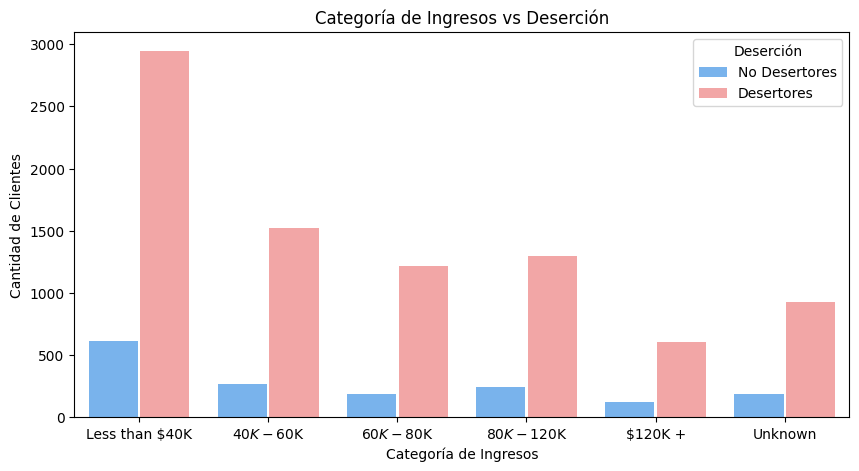

In [42]:
#Gráfico de barras Categoría de Ingresos vs Deserción

#Ordeno las categorías de ingresos para una mejor visualizacion del grafico
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(10, 5))
bar_plot = sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', palette=colors, order=income_order, dodge=True)
plt.title('Categoría de Ingresos vs Deserción')
plt.xlabel('Categoría de Ingresos')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Deserción', labels=['No Desertores', 'Desertores'])
plt.grid(False)

#Ajusto el ancho de las barras
for patch in bar_plot.patches:
    current_width = patch.get_width()
    diff = current_width * 0.05
    patch.set_width(current_width - diff)
    patch.set_x(patch.get_x() + diff / 2)

plt.show()

Podemos observar mediante este gráfico de barras comparativo que los clientes con ingresos menores a 60k presentan una desercion mas alta, siendo aquellos con ingresos menores a $40K los más propensos a desertar.

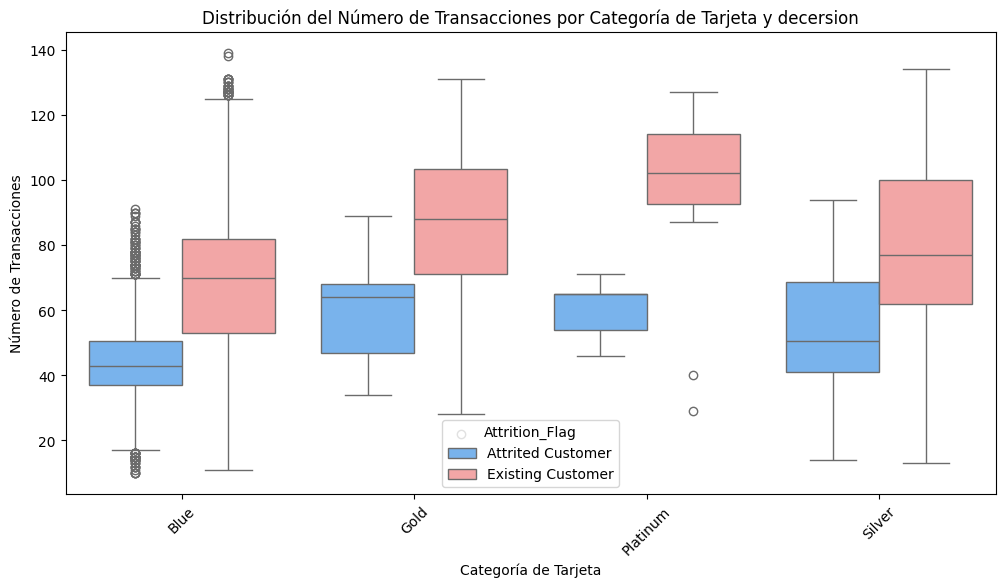

In [44]:
# Boxplot para la distribucion del numero de transacciones por categoria de tarjeta y decersion
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Card_Category', y='Total_Trans_Ct', hue='Attrition_Flag', palette= colors)
plt.title('Distribución del Número de Transacciones por Categoría de Tarjeta y decersion')
plt.xlabel('Categoría de Tarjeta')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.show()

El gráfico de caja nos muestra claramente que el número de transacciones es un factor importante en la retención de clientes en todas las categorias. Los clientes que desertan tienden a realizar menos transacciones y tienen una menor variabilidad en su uso de la tarjeta. Las categorías Blue y Silver mostrando diferencias más marcadas entre los clientes existentes y los desertores.Podemos observar en la categoria Blue bastantes outliers, en caso de los positivos, considero que son clientes valiosos o satisfechos, por eso su numero de transacciones es mayor al promedio, mientras que los outliers negativos, muestran que los clientes realizan un número de transacciones mucho menor que el promedio, lo que hace sospechar que podrian estar en riesgo de deserción.

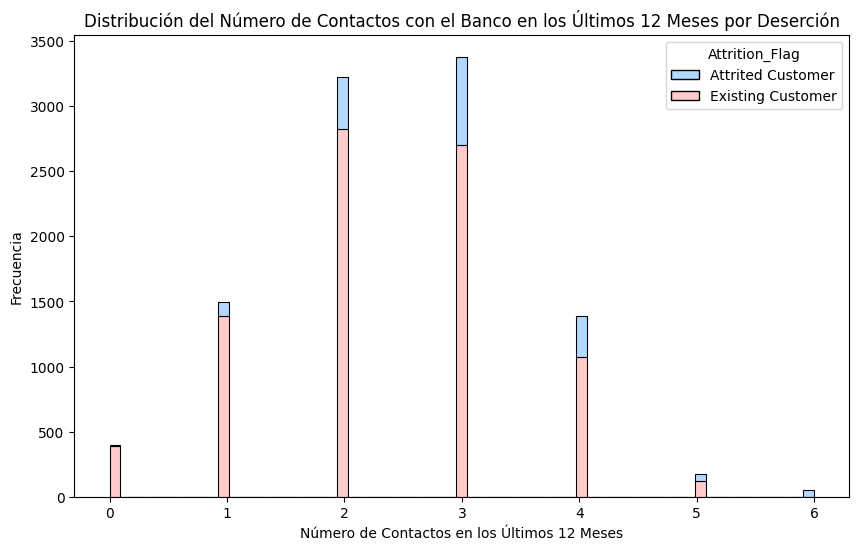

In [12]:
# Colores para el gráfico
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Contacts_Count_12_mon', hue='Attrition_Flag', multiple='stack', palette= colors, alpha=0.5)
plt.title('Distribución del Número de Contactos con el Banco en los Últimos 12 Meses por Deserción')
plt.xlabel('Número de Contactos en los Últimos 12 Meses')
plt.ylabel('Frecuencia')
plt.show()


Este histograma nos muestra que los clientes no desertores tienden a tener un número moderado de contactos con el banco (2-3 veces en 12 meses), lo que podría reflejar una relación saludable y satisfactoria. Por otro lado, los clientes desertores muestran una mayor variabilidad en su número de contactos lo que puede indicar problemas de satisfacción o necesidades no atendidas.

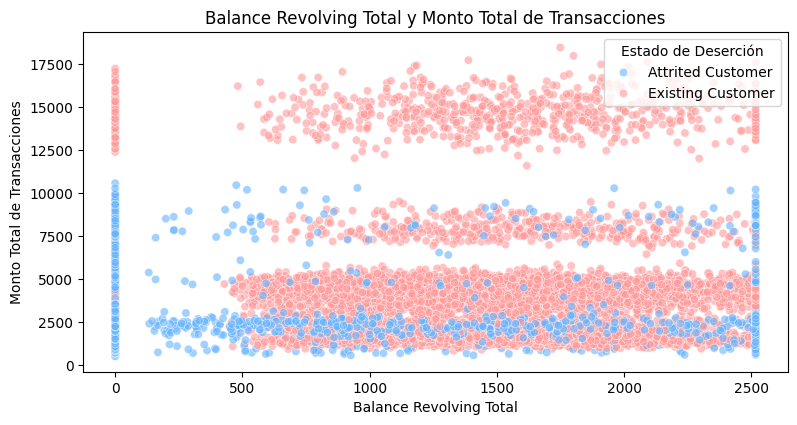

In [13]:
plt.figure(figsize=(20, 15))
colors = ['#66b3ff', '#ff9999']

#gráfico de dispersión del Balance revolving total y deserción

plt.subplot(3, 2, 3)
sns.scatterplot(x='Total_Revolving_Bal', y='Total_Trans_Amt', hue='Attrition_Flag', data=df, alpha=0.6, palette=colors)
plt.title('Balance Revolving Total y Monto Total de Transacciones')
plt.xlabel('Balance Revolving Total')
plt.ylabel('Monto Total de Transacciones')
plt.legend(title='Estado de Deserción', loc='upper right')


El gráfico de dispersión muestra una clara diferencia en los patrones de uso entre los clientes que se quedan y los que deserten. Aquellos que deserten tienden a tener balances revolving más bajos y montos de transacciones menores.

<ipython-input-14-6f66a2f6d68d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Attrition_Flag', y='Credit_Limit', palette=colors)


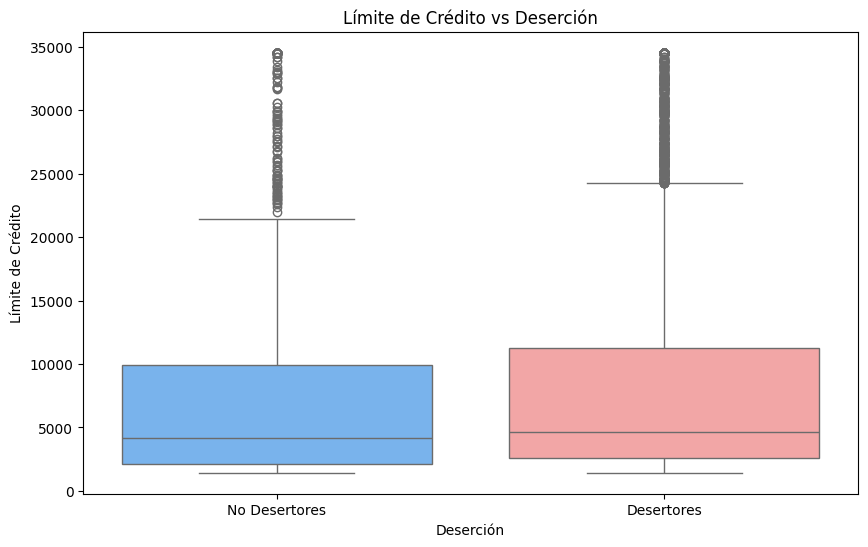

In [14]:
#Boxplot para el Límite de Crédito vs Deserción
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Attrition_Flag', y='Credit_Limit', palette=colors)
plt.title('Límite de Crédito vs Deserción')
plt.xlabel('Deserción')
plt.ylabel('Límite de Crédito')
plt.xticks(ticks=[0, 1], labels=['No Desertores', 'Desertores'])
plt.grid(axis='y')
plt.grid(False)
plt.show()


El gráfico sugiere que los clientes con límites de crédito más altos tienden a desertar menos.
Además podemos observar que existen varios outliers con límites de crédito extremadamente altos, lo que sugiere que algunos clientes no desertores tienen acceso a límites de crédito mucho mayores. Esto nos podria indicar que los clientes son valiosos.
Para los clientes que desertan tambien vemos outliers positivos con altos límites de crédito, podrían haber dejado el banco debido a factores no relacionados con el crédito como estar insatisfechos con el servicio.

**Vamos a tratar estos outliers para un analisis mas prolijo:**

In [15]:
import pandas as pd

#Función para identificar outliers usando IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

#Identifico los outliers en 'Credit_Limit'
outliers, lower_bound, upper_bound = identify_outliers(df, 'Credit_Limit')

print("Número de outliers:", len(outliers))
print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)



Número de outliers: 984
Límite inferior: -10213.75
Límite superior: 23836.25


In [16]:
#Imputo los outliers con los valores de los límites
df_imputed = df.copy()
df_imputed.loc[df_imputed['Credit_Limit'] < lower_bound, 'Credit_Limit'] = lower_bound
df_imputed.loc[df_imputed['Credit_Limit'] > upper_bound, 'Credit_Limit'] = upper_bound


<ipython-input-17-84a31bfa5626>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_imputed, x='Attrition_Flag', y='Credit_Limit', palette=colors)


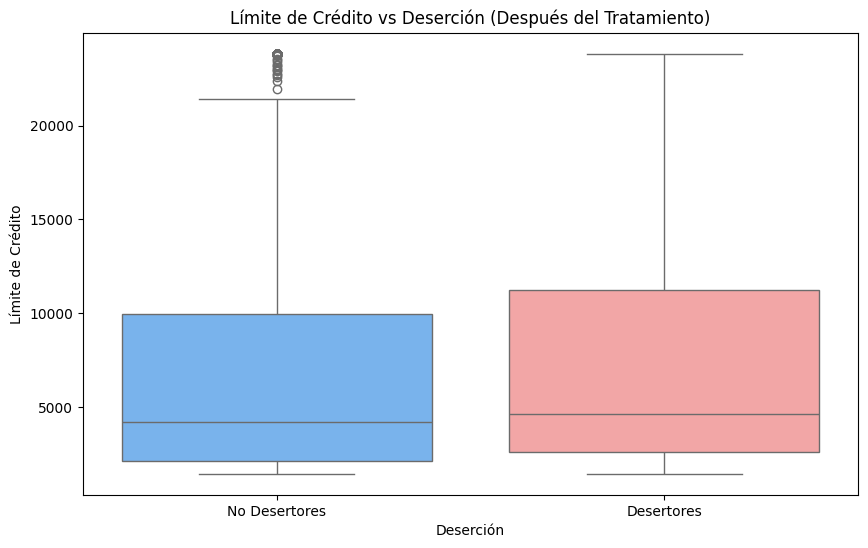

In [17]:
#Visualización después del tratamiento
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, x='Attrition_Flag', y='Credit_Limit', palette=colors)
plt.title('Límite de Crédito vs Deserción (Después del Tratamiento)')
plt.xlabel('Deserción')
plt.ylabel('Límite de Crédito')
plt.xticks(ticks=[0, 1], labels=['No Desertores', 'Desertores'])
plt.grid(axis='y')
plt.grid(False)
plt.show()


Después de la identificación y el tratamiento de la mayoría de los outliers, notamos que aún podemos visualizar algunos outliers en el grupo de los no desertores. Estos outliers no parecen ilógicos, ya que es posible que algunos no desertores tengan límites de crédito considerablemente más altos.

<ipython-input-18-443be3ee50a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, palette=colors)


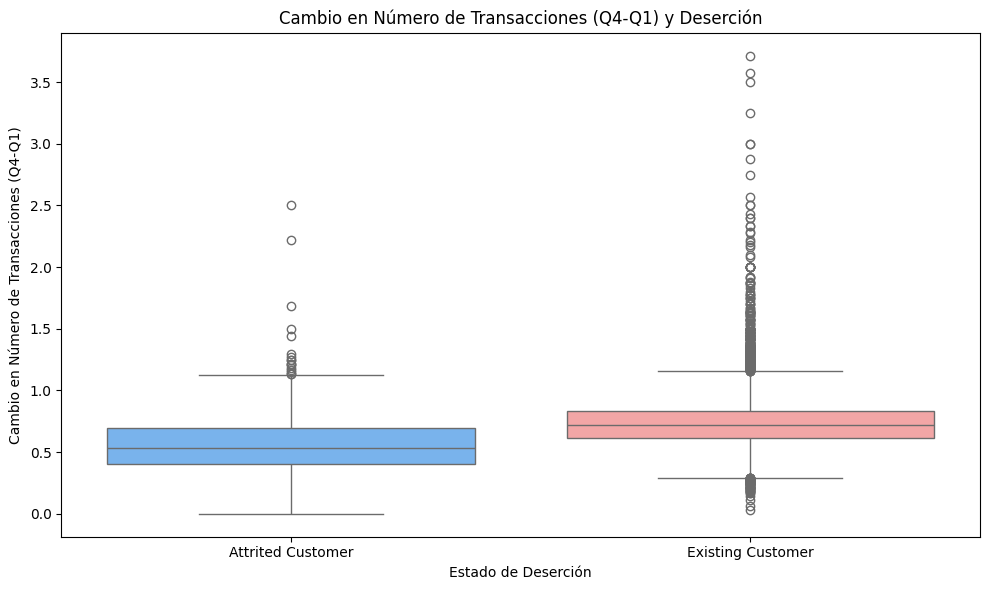

In [18]:

#gráfico para analizar el cambio en el número de transacciones (Q4-Q1) y deserción
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, palette=colors)
plt.title('Cambio en Número de Transacciones (Q4-Q1) y Deserción')
plt.xlabel('Estado de Deserción')
plt.ylabel('Cambio en Número de Transacciones (Q4-Q1)')

plt.tight_layout()
plt.show()


El grafico nos muestra que los clientes que permanecen muestran una mayor variabilidad en el cambio de transacciones, con algunos experimentando aumentos significativos.
La mediana del cambio en el número de transacciones es más alta para los clientes que permanecen, o sea que estos tienden a mantener o aumentar su nivel de transacciones.
Podemos identificar muchos outliers, outliers bajos pueden señalar una reducción drástica en el uso de la tarjeta antes de la deserción, este cambio es importante y nos podria permitir identificar futuros desertores.
Los outliers altos pueden indicar situaciones especiales donde los clientes aumentaron notablemente su uso de la tarjeta.
**Dado que estos outliers proporcionan información valiosa pero también pueden distorsionar nuestro análisis, vamos a tratarlos adecuadamente para modelar los datos de la mejor manera posible.**

In [19]:

# Función para identificar outliers usando IQR
def identify_outliers(df, feature, factor=1.5):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identificar outliers en 'Total_Ct_Chng_Q4_Q1' usando un factor estándar de 1.5
outliers, lower_bound, upper_bound = identify_outliers(df, 'Total_Ct_Chng_Q4_Q1', factor=1.5)

print("Número de outliers:", len(outliers))
print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

Número de outliers: 394
Límite inferior: 0.22799999999999998
Límite superior: 1.172


<a id="conclusion-eda"></a>
#  **Conclusión Análisis Exploratorio de Datos (EDA)**

**Distribución de la Variable Objetivo (Attrition_Flag)**
El análisis de la variable objetivo revela que una proporción significativa de clientes han desertado, lo cual justifica la necesidad del análisis detallado para entender los factores que influyen en esta deserción.

**Distribución del Nivel de Ingresos**
La exploración de la distribución del nivel de ingresos muestra que los clientes con ingresos más bajos son más propensos a desertar. Los gráficos de distribución y boxplots indican una mayor concentración de desertores en las categorías de ingresos más bajos.

**Uso de la Tarjeta**
Los gráficos de uso de la tarjeta de crédito muestran una tendencia a que los clientes que utilizan más su tarjeta tienden a permanecer en el banco. La distribución del número de transacciones y el monto total de las transacciones refuerzan esta observación.

**Contactos con el Banco**
La exploración de los datos de contacto con el banco revela que tanto los contactos excesivos como los insuficientes están asociados con una mayor deserción. Los gráficos de distribución y boxplots indican una relación no lineal entre la frecuencia de contacto y la retención del cliente.

**Balance Revolving Total y Monto Total de Transacciones**
Los gráficos muestran que los clientes con balances revolving más bajos y montos de transacciones menores tienen una mayor probabilidad de desertar. En contraste, aquellos con balances más altos y montos de transacciones mayores tienden a permanecer.

**Límite de Crédito**
La exploración del límite de crédito indica que los clientes con límites más altos tienen una menor tasa de deserción. Los gráficos de distribución y boxplots muestran una clara separación entre los desertores y los no desertores en términos de sus límites de crédito.

**Cambio en el Número de Transacciones (Q4-Q1)**
El análisis del cambio en el número de transacciones entre el cuarto y el primer trimestre muestra que los clientes que permanecen tienden a mantener o aumentar sus transacciones, mientras que aquellos que desertan presentan una disminución significativa.


<a id="modelo-de-arbol-de-decision"></a>
# **Modelo de Predicción con Árbol de Decisión**

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

#Cargo el dataset
url = 'https://raw.githubusercontent.com/Melanydaian/ProyectoDS_Parte1_Amarillo/main/BankChurners.csv'
df = pd.read_csv(url)


#Inspecciono nuevamente los valores únicos en la columna 'Attrition_Flag' antes del mapeo
print("Valores únicos en 'Attrition_Flag' antes del mapeo:", df['Attrition_Flag'].unique())
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#Verifico si hay valores nulos después del mapeo
print("Valores nulos en 'Attrition_Flag' después del mapeo:", df['Attrition_Flag'].isnull().sum())

#Paso las variables categoricas a numericas
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])




Valores únicos en 'Attrition_Flag' antes del mapeo: ['Existing Customer' 'Attrited Customer']
Valores nulos en 'Attrition_Flag' después del mapeo: 0


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2543
           1       0.79      0.79      0.79       496

    accuracy                           0.93      3039
   macro avg       0.87      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039

Confusion Matrix:
 [[2439  104]
 [ 105  391]]
ROC-AUC Score: 0.873704936384509


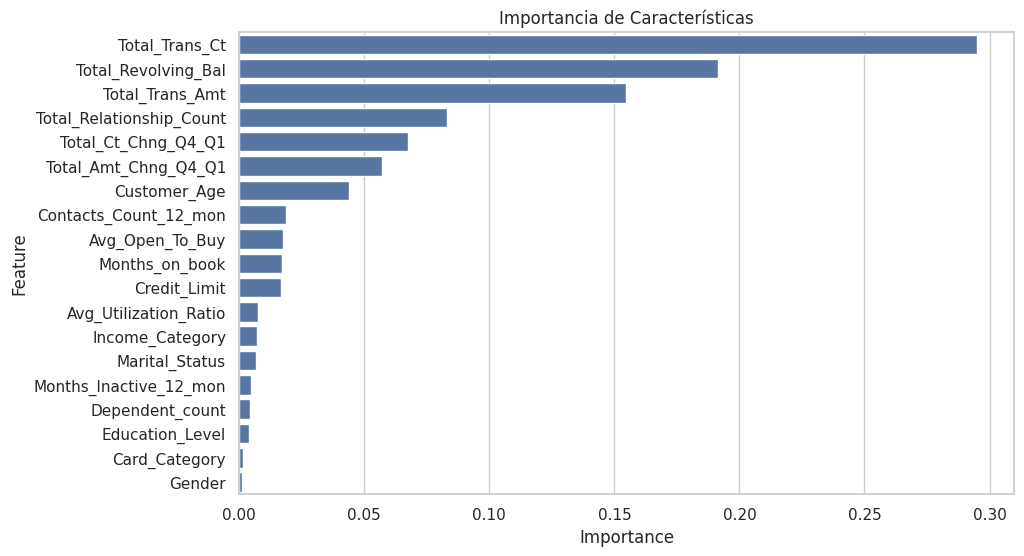

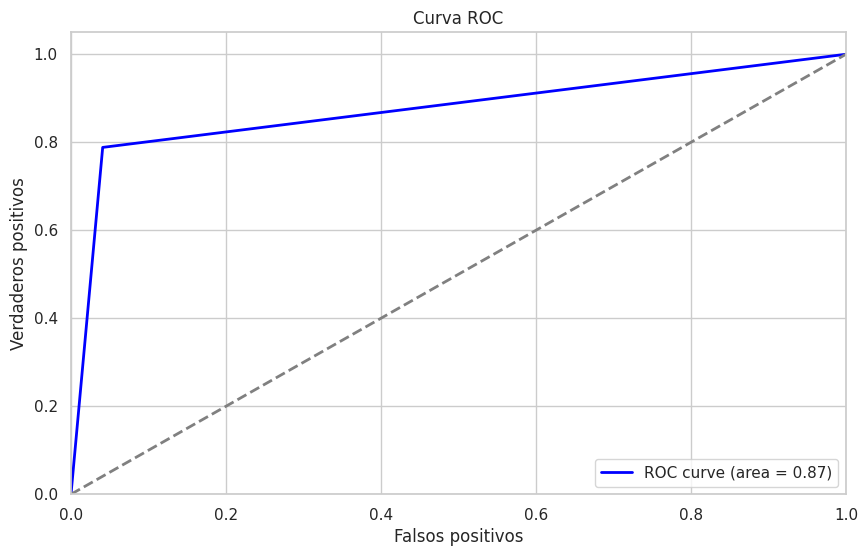

In [69]:
#Elimino las columnas innecesarias para que no las tome
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

df_cleaned = df.drop(columns=columns_to_drop)

#Seleccion de características y variable objetivo
X = df_cleaned.drop(columns=['Attrition_Flag'])
y = df_cleaned['Attrition_Flag']

#Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Entreno con el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#Se predice el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

#Se Evalua el modelo
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

#Grafico la importancia de características segun el arbol de decision
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Características')
plt.show()

#Grafico la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

<a id="modelo-de-regresion-logistica"></a>
# **Modelo de predicción con regresión logistica**

In [79]:
# Eliminar columnas innecesarias
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df_cleaned = df.drop(columns=columns_to_drop)

# Convertir la variable objetivo a valores binarios (0 y 1)
df_cleaned['Attrition_Flag'] = df_cleaned['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Pasar las variables categóricas a numéricas
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])

# Selección de características y variable objetivo
X = df_cleaned.drop(columns=['Attrition_Flag'])
y = df_cleaned['Attrition_Flag']

# Revisar la distribución de clases antes de dividir
print("Distribución de clases antes de dividir:\n", y.value_counts())

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Revisar la distribución de clases después de dividir
print("Distribución de clases en y_train después de dividir:\n", y_train.value_counts())
print("Distribución de clases en y_test después de dividir:\n", y_test.value_counts())

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("Classification Report (Regresión Logística):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Regresión Logística):\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score (Regresión Logística):", roc_auc_score(y_test, y_pred_prob))



Distribución de clases antes de dividir:
 Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64
Distribución de clases en y_train después de dividir:
 Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64
Distribución de clases en y_test después de dividir:
 Attrition_Flag
0    2551
1     488
Name: count, dtype: int64
Classification Report (Regresión Logística):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2551
           1       0.72      0.46      0.56       488

    accuracy                           0.88      3039
   macro avg       0.81      0.71      0.75      3039
weighted avg       0.87      0.88      0.87      3039

Confusion Matrix (Regresión Logística):
 [[2462   89]
 [ 264  224]]
ROC-AUC Score (Regresión Logística): 0.8912496545874007


<a id="conclusion-modelos"></a>
# **Comparacion de modelos predictivos**
***Árbol de Decisión:***

Este modelo es más preciso y tiene un mejor recall para ambas clases. Tiene menos falsos negativos, lo que es crucial para identificar correctamente a los desertores.
La precisión global y el F1-Score también son más altos, lo que lo hace más confiable en general.

***Regresión Logística:***
Este modelo tiene una capacidad de discriminación ligeramente mejor, como lo muestra el ROC-AUC Score.
Sin embargo, tiene un recall significativamente más bajo para los desertores y más falsos negativos, lo que podría ser problemático para detectar a todos los clientes que podrían desertar.

# **Conclusion:**
En conclusión, el análisis y modelado de la deserción de clientes han permitido identificar los factores clave que influyen en este fenómeno. El modelo de Árbol de Decisión se destaca como la mejor opción para predecir la deserción de clientes. Las estrategias de retención deben enfocarse en los factores identificados para reducir la tasa de deserción y mejorar la fidelización de los clientes.

